# Image Classification Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
Y_train[:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [4]:
### Need to reshape Y_train & Y_test
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

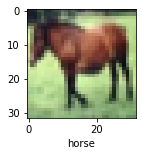

In [8]:
sample(X_train, Y_train, 7)

In [9]:
### Now let us normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
### Build CNN to train images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5192 - accuracy: 0.4526
Epoch 2/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1610 - accuracy: 0.5922
Epoch 3/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0256 - accuracy: 0.6441
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9473 - accuracy: 0.6722
Epoch 5/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8879 - accuracy: 0.6911
Epoch 6/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8330 - accuracy: 0.7120
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7893 - accuracy: 0.7278
Epoch 8/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7460 - accuracy: 0.7419
Epoch 9/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7096 - accuracy: 0.7537
Epoch 10/15
1563/1563 [==============================] - 52s 33m

In [14]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9909 - accuracy: 0.6959


[0.9909371137619019, 0.695900022983551]

In [15]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

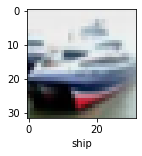

In [21]:
sample(X_test, Y_test,1)

In [22]:
classes[y_classes[1]]

'ship'